# Titulo: Mapa temático en Python.
## Diplomado: Geoestadística y análisis espacial
## SciData
## Instructor: Alexis Adonai Morales Alberto


In [ ]:
# Carga de modulos

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive

In [ ]:
# Configuración de google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta completa del archivo de mapa

ruta = '/content/drive/MyDrive/SciData/GEOAES_25/Mapas/México_ent/00ent'

In [ ]:
# Cargar mapa

Mapa = gpd.read_file(ruta + '.shp')
Mapa.tail(5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Carga de datos de incidencia delictiva

ruta = '/content/drive/MyDrive/SciData/GEOAES_25/Bases/IDFC_oct2025.csv'

Data = pd.read_csv(ruta, encoding = "cp1252")
Data.head(5)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0


In [ ]:
# Añadir columna de total

meses = ['Enero', 'Febrero', 'Marzo',
         'Abril',	'Mayo',	'Junio',
         'Julio',	'Agosto',	'Septiembre',
         'Octubre',	'Noviembre',	'Diciembre']

Data['Total'] = Data[meses].sum(axis=1)

Data.head(5)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0,18.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0,5.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0,12.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0,3.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0


In [ ]:
# Filtrar por delitos de homicidio doloso
Data_filtro = Data.copy()
Data_filtro = Data_filtro[Data_filtro['Subtipo de delito'] == "Homicidio doloso"]
Data_filtro.head(5)


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0,18.0
98,2015,2,Baja California,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,20,26,33,42,49,43,46,50,57,44,51.0,36.0,497.0
196,2015,3,Baja California Sur,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,11,4,4,11,12,3,8,17,27,2,0.0,3.0,102.0
294,2015,4,Campeche,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,1,1,3,1,1,0,2,0,1,1.0,3.0,15.0
392,2015,5,Coahuila de Zaragoza,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,28,11,15,12,8,9,15,8,7,7,6.0,13.0,139.0


In [ ]:
# Sumas agrupadas

Data_tot_hom = Data_filtro.copy()
Data_tot_hom = Data_tot_hom.groupby(['Año',	'Clave_Ent',	'Entidad'])['Total'].sum().reset_index()
Data_tot_hom.head(32)

,Año,Clave_Ent,Entidad,Total
0,2015,1,Aguascalientes,38.0
1,2015,2,Baja California,821.0
2,2015,3,Baja California Sur,151.0
3,2015,4,Campeche,49.0
4,2015,5,Coahuila de Zaragoza,278.0
5,2015,6,Colima,162.0
6,2015,7,Chiapas,502.0
7,2015,8,Chihuahua,945.0
8,2015,9,Ciudad de México,798.0
9,2015,10,Durango,236.0


In [ ]:
# Verificar columnas

Mapa[['CVE_ENT', 'NOMGEO']].dtypes

,0
CVE_ENT,object
NOMGEO,object


In [ ]:
Data_tot_hom[['Clave_Ent', 'Entidad']].dtypes

,0
Clave_Ent,int64
Entidad,object


In [ ]:
# Combinar datos solo de 2024 con el mapa

Mapa = Mapa.merge(
    Data_tot_hom[Data_tot_hom['Año'] == 2024],
    left_on= ["NOMGEO"],
    right_on=["Entidad"],
    how = 'left'
)

In [ ]:
Mapa.head(2)

Output hidden; open in https://colab.research.google.com to view.

<Figure size 7500x6000 with 0 Axes>

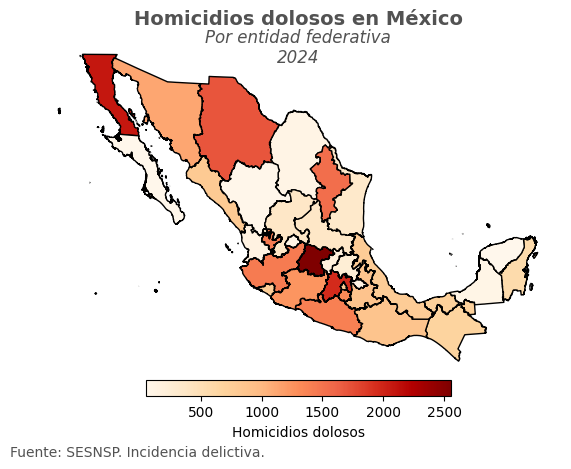

In [ ]:
# Mapa temático con variable continua

plt.figure(figsize=(15,12), dpi = 500)
Mapa.plot(
    column = 'Total',
    legend = True,
    cmap = 'OrRd',
    legend_kwds = {'label': "Homicidios dolosos",
                   'orientation': 'horizontal',
                   'shrink': 0.5, # Reduce el tamaño a la mitad
                   'pad': 0.01}, #Acercar leyenda al mapa
    edgecolor = "black"
)
plt.axis('off') # Quita los ejes
plt.figtext(0.5, 0.95, "Homicidios dolosos en México",
            fontweight = 'bold',
            color = "#525252",
            ha = 'center',
            fontsize = 14) # Titulo
plt.figtext(0.5, 0.87, "Por entidad federativa\n2024",
            style = "italic",
            color = "#525252",
            ha = 'center',
            fontsize = 12) # Subtitulo
plt.figtext(0.05, 0.05, "Fuente: SESNSP. Incidencia delictiva.",
            color = "#525252",
            fontsize = 10) # Pie de gráfico
plt.grid(False)
plt.tight_layout(rect = [0,0.05,1,0.95])
ruta_guardado = '/content/drive/MyDrive/SciData/GEOAES_25/Salidas/Mapa1_final.png'
plt.savefig(ruta_guardado, dpi = 500, bbox_inches = 'tight', facecolor = 'white')

<Figure size 7500x6000 with 0 Axes>

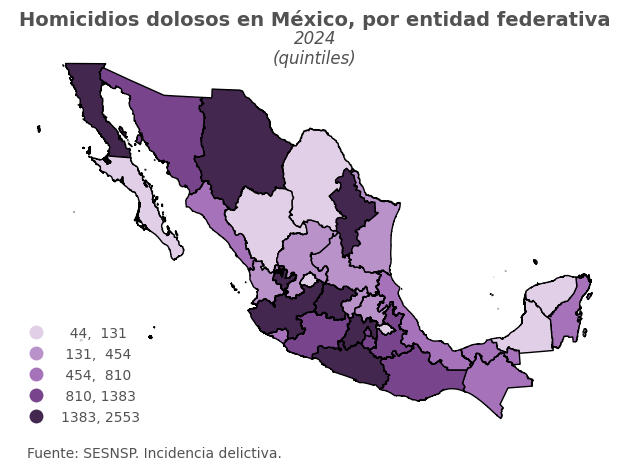

In [ ]:
# Definición de paleta

from matplotlib.colors import ListedColormap

Colores = [
    "#E1CFE7",
    "#B992C9",
    "#A673BA",
    "#78458C",
    "#43274F"
  ]

cmap_manual = ListedColormap(Colores)


# Mapa temático con variable continua

plt.figure(figsize=(15,12), dpi = 500)
Mapa.plot(
    column = 'Total',
    scheme = 'Quantiles',
    k = 5,
    legend = True,
    cmap = cmap_manual,
    legend_kwds = {'loc': 'lower left',
                   'fmt': "{:.0f}"},
    edgecolor = "black"
)
plt.axis('off') # Quita los ejes
plt.figtext(0.5, 0.95, "Homicidios dolosos en México, por entidad federativa",
            fontweight = 'bold',
            color = "#525252",
            ha = 'center',
            fontsize = 14) # Titulo
plt.figtext(0.5, 0.87, "2024\n(quintiles)",
            style = "italic",
            color = "#525252",
            ha = 'center',
            fontsize = 12) # Subtitulo
plt.figtext(0.05, 0.05, "Fuente: SESNSP. Incidencia delictiva.",
            color = "#525252",
            fontsize = 10) # Pie de gráfico
ax = plt.gca()
leg = ax.get_legend()
for text in leg.get_texts():
  text.set_color('#525252')
if leg is not None:
  leg.get_frame().set_linewidth(0)
  leg.get_frame().set_edgecolor("none")
plt.grid(False)
plt.tight_layout(rect = [0,0.05,1,0.95])
ruta_guardado = '/content/drive/MyDrive/SciData/GEOAES_25/Salidas/Mapa2_final.png'
plt.savefig(ruta_guardado, dpi = 500, bbox_inches = 'tight', facecolor = 'white')